In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-food-101/indian_food.csv


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [4]:
data = pd.read_csv('/kaggle/input/indian-food-101/indian_food.csv')
data

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [9]:
food_vocab = set()

for ingredients in data['ingredients']:
    for food in ingredients.split(','):
        if food.strip().lower() not in food_vocab:
            food_vocab.add(food.strip().lower())

In [13]:
# food_vocab
# len(food_vocab)

In [15]:
food_columns = pd.DataFrame()

for i, ingredients in enumerate(data['ingredients']):
    for food in ingredients.split(','):
        if food.strip().lower() in food_vocab:
            food_columns.loc[i, food.strip().lower()] = 1
            
food_columns = food_columns.fillna(0)

In [16]:
food_columns

,maida flour,yogurt,oil,sugar,gram flour,ghee,carrots,milk,cashews,raisins,...,soaked rice,cardamom pods,red pepper,watercress,glutinous rice,egg yolks,dry dates,dried rose petals,arrowroot powder,ginger powder
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
data = data.drop(['name', 'ingredients'], axis=1)
data

,diet,prep_time,cook_time,flavor_profile,course,state,region
0,vegetarian,45,25,sweet,dessert,West Bengal,East
1,vegetarian,80,30,sweet,dessert,Rajasthan,West
2,vegetarian,15,60,sweet,dessert,Punjab,North
3,vegetarian,15,30,sweet,dessert,Rajasthan,West
4,vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...
250,vegetarian,5,30,sweet,dessert,Assam,North East
251,vegetarian,20,60,sweet,dessert,Goa,West
252,vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [19]:
{column: list(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}

{'diet': ['vegetarian', 'non vegetarian'],
 'flavor_profile': ['sweet', 'spicy', 'bitter', '-1', 'sour'],
 'course': ['dessert', 'main course', 'starter', 'snack'],
 'state': ['West Bengal',
  'Rajasthan',
  'Punjab',
  'Uttar Pradesh',
  '-1',
  'Odisha',
  'Maharashtra',
  'Uttarakhand',
  'Assam',
  'Bihar',
  'Andhra Pradesh',
  'Karnataka',
  'Telangana',
  'Kerala',
  'Tamil Nadu',
  'Gujarat',
  'Tripura',
  'Manipur',
  'Nagaland',
  'NCT of Delhi',
  'Jammu & Kashmir',
  'Chhattisgarh',
  'Haryana',
  'Madhya Pradesh',
  'Goa'],
 'region': ['East',
  'West',
  'North',
  '-1',
  'North East',
  'South',
  'Central',
  nan]}

In [21]:
data[['flavor_profile', 'state', 'region']] = data[['flavor_profile', 'state', 'region']].replace('-1', np.NaN)

In [22]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix = prefix)
        df = pd.concat([df, dummies], axis = 1)
        df = df.drop(column, axis = 1)
    return df

In [23]:
data = onehot_encode(
    data,
    ['flavor_profile', 'course', 'state', 'region'],
    ['f', 'c', 's', 'r']
)

In [24]:
data

,diet,prep_time,cook_time,f_bitter,f_sour,f_spicy,f_sweet,c_dessert,c_main course,c_snack,...,s_Tripura,s_Uttar Pradesh,s_Uttarakhand,s_West Bengal,r_Central,r_East,r_North,r_North East,r_South,r_West
0,vegetarian,45,25,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,vegetarian,80,30,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,vegetarian,15,60,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,vegetarian,15,30,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,vegetarian,15,40,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,vegetarian,5,30,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
251,vegetarian,20,60,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
252,vegetarian,-1,-1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
253,vegetarian,20,45,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [26]:
data[['prep_time', 'cook_time']] = data[['prep_time', 'cook_time']].replace(-1, np.NaN)

In [27]:
data

,diet,prep_time,cook_time,f_bitter,f_sour,f_spicy,f_sweet,c_dessert,c_main course,c_snack,...,s_Tripura,s_Uttar Pradesh,s_Uttarakhand,s_West Bengal,r_Central,r_East,r_North,r_North East,r_South,r_West
0,vegetarian,45.0,25.0,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,vegetarian,80.0,30.0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,vegetarian,15.0,60.0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,vegetarian,15.0,30.0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,vegetarian,15.0,40.0,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,vegetarian,5.0,30.0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
251,vegetarian,20.0,60.0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
252,vegetarian,NaN,NaN,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
253,vegetarian,20.0,45.0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [29]:
data['prep_time'] = data['prep_time'].fillna(data['prep_time'].mean())
data['cook_time'] = data['cook_time'].fillna(data['cook_time'].mean())

In [30]:
data

,diet,prep_time,cook_time,f_bitter,f_sour,f_spicy,f_sweet,c_dessert,c_main course,c_snack,...,s_Tripura,s_Uttar Pradesh,s_Uttarakhand,s_West Bengal,r_Central,r_East,r_North,r_North East,r_South,r_West
0,vegetarian,45.000000,25.000000,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,vegetarian,80.000000,30.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,vegetarian,15.000000,60.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,vegetarian,15.000000,30.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,vegetarian,15.000000,40.000000,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,vegetarian,5.000000,30.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
251,vegetarian,20.000000,60.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
252,vegetarian,35.386667,38.911894,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
253,vegetarian,20.000000,45.000000,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [31]:
label_encoder = LabelEncoder()
data['diet'] = label_encoder.fit_transform(data['diet'])

In [32]:
{index: label for index, label in enumerate(label_encoder.classes_)}

{0: 'non vegetarian', 1: 'vegetarian'}

In [33]:
data

,diet,prep_time,cook_time,f_bitter,f_sour,f_spicy,f_sweet,c_dessert,c_main course,c_snack,...,s_Tripura,s_Uttar Pradesh,s_Uttarakhand,s_West Bengal,r_Central,r_East,r_North,r_North East,r_South,r_West
0,1,45.000000,25.000000,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,1,80.000000,30.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,15.000000,60.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,15.000000,30.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,15.000000,40.000000,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,1,5.000000,30.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
251,1,20.000000,60.000000,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
252,1,35.386667,38.911894,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
253,1,20.000000,45.000000,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [34]:
y = data['diet']

X = data.drop('diet', axis = 1)
X_food = pd.concat([X, food_columns], axis = 1)

In [35]:
scaler = StandardScaler()

X = scaler.fit_transform(X)
X_food = scaler.fit_transform(X_food)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state= 42)
X_food_train, X_food_test, y_food_train, y_food_test = train_test_split(X_food, y, train_size = 0.7, random_state= 42)

In [40]:
def build_model(num_features, hidden_layer_sizes=(64, 64)):
    inputs = tf.keras.Input(shape=(num_features,))
    x = tf.keras.layers.Dense(hidden_layer_sizes[0], activation='relu')(inputs)
    x = tf.keras.layers.Dense(hidden_layer_sizes[1], activation='relu')(x)
    outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)
    
    model = tf.keras.Model(inputs = inputs, outputs = outputs)
    
    model.compile(
        optimizer = 'adam',
        loss = 'binary_crossentropy',
        metrics = [
            'accuracy',
            tf.keras.metrics.AUC(name='auc')
        ]
    )
    return model

In [41]:
X.shape

(255, 40)

In [43]:
model = build_model(40)

batch_size = 64
epochs = 100

history = model.fit(
    X_train, 
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs,
    callbacks = [tf.keras.callbacks.ReduceLROnPlateau()]
)

2022-12-06 13:10:40.169218: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
3/3 [==============================] - 2s 222ms/step - loss: 0.7701 - accuracy: 0.3732 - auc: 0.5756 - val_loss: 0.7206 - val_accuracy: 0.5278 - val_auc: 0.6103
Epoch 2/100
3/3 [==============================] - 0s 24ms/step - loss: 0.6305 - accuracy: 0.6972 - auc: 0.6809 - val_loss: 0.5537 - val_accuracy: 0.8056 - val_auc: 0.8235
Epoch 3/100
3/3 [==============================] - 0s 21ms/step - loss: 0.5301 - accuracy: 0.8310 - auc: 0.8041 - val_loss: 0.4297 - val_accuracy: 0.9167 - val_auc: 0.8971
Epoch 4/100
3/3 [==============================] - 0s 22ms/step - loss: 0.4626 - accuracy: 0.8521 - auc: 0.7928 - val_loss: 0.3400 - val_accuracy: 0.9444 - val_auc: 0.9412
Epoch 5/100
3/3 [==============================] - 0s 23ms/step - loss: 0.4187 - accuracy: 0.8592 - auc: 0.7527 - val_loss: 0.2791 - val_accuracy: 0.9444 - val_auc: 0.9559
Epoch 6/100
3/3 [==============================] - 0s 22ms/step - loss: 0.3850 - accuracy: 0.8592 - auc: 0.7639 - val_loss: 0.2397 - val_ac

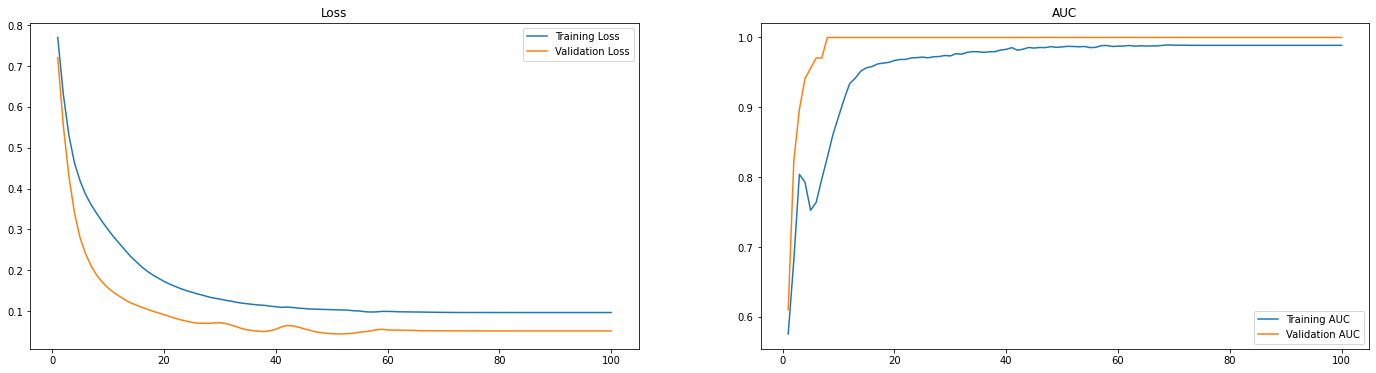

In [48]:
plt.figure(figsize=(24,6))

epochs_range = range(1, epochs + 1)
train_loss, val_loss = history.history['loss'], history.history['val_loss']
train_auc, val_auc = history.history['auc'], history.history['val_auc']

plt.subplot(1,2,1)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range, train_auc, label='Training AUC')
plt.plot(epochs_range, val_auc, label = 'Validation AUC')
plt.title('AUC')
plt.legend()

In [49]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.4437 - accuracy: 0.8571 - auc: 0.7061


[0.4437209665775299, 0.8571428656578064, 0.7061223983764648]

In [50]:
## second model for X_food
X_food.shape

(255, 405)

In [57]:
food_model = build_model(405)

food_batch_size = 64
food_epochs = 100

food_history = food_model.fit(
    X_food_train, 
    y_food_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = food_epochs,
    callbacks = [tf.keras.callbacks.ReduceLROnPlateau()]
)

Epoch 1/100
3/3 [==============================] - 1s 220ms/step - loss: 0.6722 - accuracy: 0.6268 - auc: 0.4936 - val_loss: 0.4987 - val_accuracy: 0.8056 - val_auc: 0.5735
Epoch 2/100
3/3 [==============================] - 0s 32ms/step - loss: 0.4798 - accuracy: 0.8310 - auc: 0.6264 - val_loss: 0.4037 - val_accuracy: 0.9444 - val_auc: 0.5588
Epoch 3/100
3/3 [==============================] - 0s 27ms/step - loss: 0.3812 - accuracy: 0.8662 - auc: 0.7553 - val_loss: 0.3536 - val_accuracy: 0.9444 - val_auc: 0.5588
Epoch 4/100
3/3 [==============================] - 0s 36ms/step - loss: 0.3237 - accuracy: 0.8662 - auc: 0.8494 - val_loss: 0.3229 - val_accuracy: 0.9444 - val_auc: 0.5588
Epoch 5/100
3/3 [==============================] - 0s 31ms/step - loss: 0.2778 - accuracy: 0.8662 - auc: 0.9143 - val_loss: 0.3072 - val_accuracy: 0.9444 - val_auc: 0.5588
Epoch 6/100
3/3 [==============================] - 0s 29ms/step - loss: 0.2384 - accuracy: 0.8873 - auc: 0.9498 - val_loss: 0.2998 - val_ac

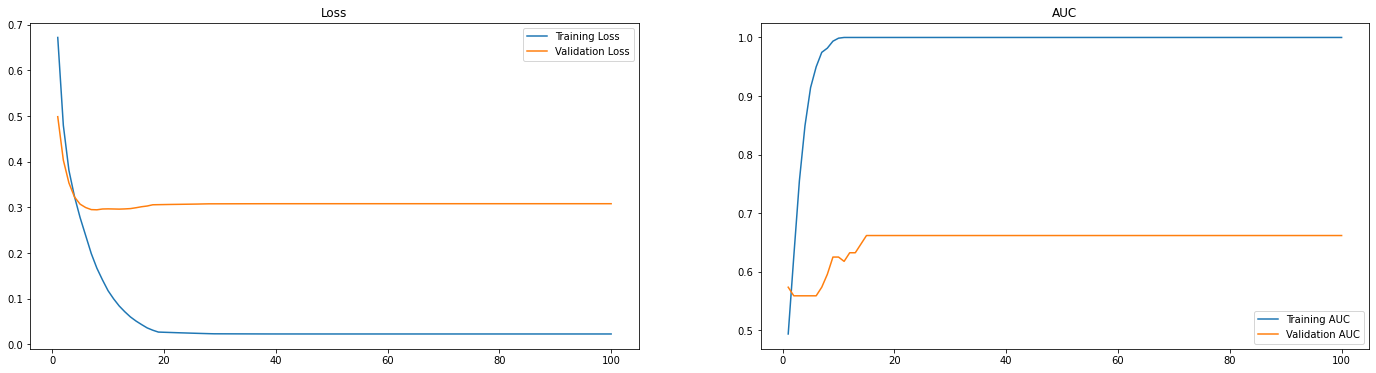

In [58]:
plt.figure(figsize=(24,6))

food_epochs_range = range(1, food_epochs + 1)
food_train_loss, food_val_loss = food_history.history['loss'], food_history.history['val_loss']
food_train_auc, food_val_auc = food_history.history['auc'], food_history.history['val_auc']

plt.subplot(1,2,1)
plt.plot(food_epochs_range, food_train_loss, label='Training Loss')
plt.plot(food_epochs_range, food_val_loss, label = 'Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(food_epochs_range, food_train_auc, label='Training AUC')
plt.plot(food_epochs_range, food_val_auc, label = 'Validation AUC')
plt.title('AUC')
plt.legend()

plt.show()

In [59]:
print(np.argmin(food_val_loss), np.argmax(food_val_auc))

7 14


In [60]:
food_model.evaluate(X_food_test, y_food_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.3336 - accuracy: 0.8571 - auc: 0.7459


[0.33359676599502563, 0.8571428656578064, 0.7459183931350708]